In [7]:
import pandas as pd
df = pd.read_csv("BECHDEL___masterList.csv", dtype={'budget': float, 'revenue': float, 
                                                    'vote_count': float, 'Bechdel_Test': float})
df.head(3)

,winner,movie_title,cast,crew,budget,genres,keywords,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,Bechdel_Test
0,1.0,lawrence of arabia,"[{""cast_id"": 18, ""character"": ""T.E. Lawrence"",...","[{""credit_id"": ""5715157dc3a3684122010c0c"", ""de...",15000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...","[{""id"": 487, ""name"": ""cairo""}, {""id"": 1975, ""n...",en,Lawrence of Arabia,An epic about British officer T.E. Lawrence's ...,...,1962-12-10,69995385.0,216.0,"[{""iso_639_1"": ""ar"", ""name"": ""\u0627\u0644\u06...",Released,NaN,Lawrence of Arabia,7.8,851.0,1.0
1,1.0,the longest day,"[{""cast_id"": 20, ""character"": ""Col. Thompson"",...","[{""credit_id"": ""53ba7918c3a3685eb1006f7a"", ""de...",10000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...","[{""id"": 1956, ""name"": ""world war ii""}, {""id"": ...",en,The Longest Day,"The retelling of June 6, 1944, from the perspe...",...,1962-09-25,50100000.0,178.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,This is the day that changed the world... When...,The Longest Day,7.2,234.0,0.0
2,1.0,to kill a mockingbird,"[{""cast_id"": 8, ""character"": ""Atticus Finch"", ...","[{""credit_id"": ""52fe4259c3a36847f8017773"", ""de...",2000000.0,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...","[{""id"": 577, ""name"": ""black people""}, {""id"": 8...",en,To Kill a Mockingbird,"In a small Alabama town in the 1930s, scrupulo...",...,1962-12-25,13129846.0,129.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,To Kill a Mockingbird,8.0,657.0,1.0


In [8]:
df = df.drop(['revenue', 'popularity', 'budget', 'vote_average', 'vote_count', 'movie_title', 'original_title', 'original_language', 'spoken_languages', 'tagline'], axis=1)
df.head(3)

,winner,cast,crew,genres,keywords,overview,production_companies,production_countries,release_date,runtime,status,title,Bechdel_Test
0,1.0,"[{""cast_id"": 18, ""character"": ""T.E. Lawrence"",...","[{""credit_id"": ""5715157dc3a3684122010c0c"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...","[{""id"": 487, ""name"": ""cairo""}, {""id"": 1975, ""n...",An epic about British officer T.E. Lawrence's ...,"[{""name"": ""Horizon Pictures (II)"", ""id"": 11356}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",1962-12-10,216.0,Released,Lawrence of Arabia,1.0
1,1.0,"[{""cast_id"": 20, ""character"": ""Col. Thompson"",...","[{""credit_id"": ""53ba7918c3a3685eb1006f7a"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...","[{""id"": 1956, ""name"": ""world war ii""}, {""id"": ...","The retelling of June 6, 1944, from the perspe...","[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1962-09-25,178.0,Released,The Longest Day,0.0
2,1.0,"[{""cast_id"": 8, ""character"": ""Atticus Finch"", ...","[{""credit_id"": ""52fe4259c3a36847f8017773"", ""de...","[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...","[{""id"": 577, ""name"": ""black people""}, {""id"": 8...","In a small Alabama town in the 1930s, scrupulo...","[{""name"": ""Universal Pictures"", ""id"": 33}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1962-12-25,129.0,Released,To Kill a Mockingbird,1.0


Count of Failed Bechdel Tests Films:  2806

Count of Passed Bechdel Tests Films:  1989


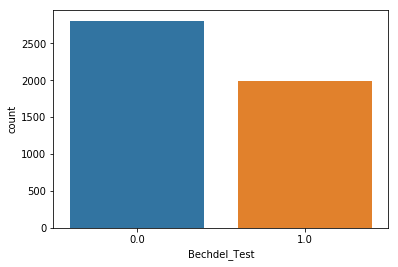

In [9]:
###### Pre-OneHot Encoding Plots ######
#######################################
import seaborn as sns
import matplotlib.pyplot as plt

print("Count of Failed Bechdel Tests Films: ", len(df.loc[df['Bechdel_Test'] == 0]))
print("\nCount of Passed Bechdel Tests Films: ", len(df.loc[df['Bechdel_Test'] == 1]))

# Basic Bar Graph compares films passing the Bechdel Test vs. films failing.
derp = sns.countplot(x='Bechdel_Test', data = df)

The strongest correlating attribute of Winning = Revenue

There also appear to be other moderate (+70%) correlations of: 
---Budget/Revenue, 
---Popularity/Vote_Count, 
---Revenue/Vote_Count


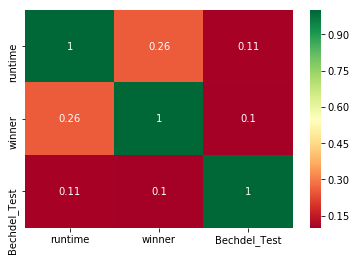

In [10]:
# Heatmap Correlation Analysis
g = sns.heatmap(df[['runtime', 'winner', 'Bechdel_Test']].corr(),cmap='RdYlGn',annot=True)

print("The strongest correlating attribute of Winning = Revenue\n\nThere also appear to be other moderate (+70%) correlations of: \n---Budget/Revenue, \n---Popularity/Vote_Count, \n---Revenue/Vote_Count")

There is small ~10% correlation to Winning/Passed-Bechdel


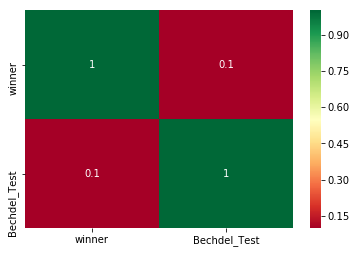

In [11]:
g = sns.heatmap(df[['winner', 'Bechdel_Test']].corr(),cmap='RdYlGn',annot=True)

print("There is small ~10% correlation to Winning/Passed-Bechdel")

X Axis:

---0.0 = Failed Bechdel Test
---1.0 = Passed Bechdel Test


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


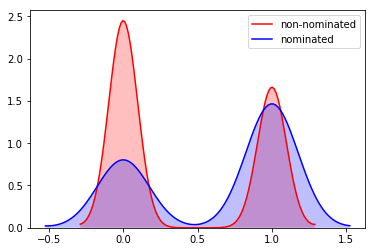

In [12]:
# Density Curve: Bechel Test
bTest0 = df[df['winner'] == 0]['Bechdel_Test']
bTest1 = df[df['winner'] == 1]['Bechdel_Test']

g = sns.kdeplot(bTest0, legend = True, shade=True, color='r', label = 'non-nominated')
g = sns.kdeplot(bTest1, legend = True, shade=True, color='b', label = 'nominated')

print("X Axis:\n\n---0.0 = Failed Bechdel Test\n---1.0 = Passed Bechdel Test")
#todo:::   change the x ticks to represent that

In [13]:
import json
import numpy as np

genres_name0 = {}
genres_name1 = {}
genres_set = set()

# Fancy Itterrows() looks for Bechdel_Test result bool, if a dictionary with the name of the
# current movie doesn't exist in the genres_name0/1 then one is appended with a tally count
# of 1. If a dict already exists then the tally count is increased by 1.
for i in range(len(df)):
    genres = json.loads(df.loc[i,'genres'])
    for it in genres:
        genres_set.add(it['name'])
        if df.loc[i,'Bechdel_Test'] == 0:
            if it['name'] not in genres_name0:
                genres_name0[it['name']] = 1
            else:
                genres_name0[it['name']] += 1
        if df.loc[i,'Bechdel_Test'] == 1:
            if it['name'] not in genres_name1:
                genres_name1[it['name']] = 1
            else:
                genres_name1[it['name']] += 1
            
genres_array0=[]
genres_array1=[]

# Binning of Genre names
for g in genres_set:
    if g in genres_name0:
        genres_array0.append(genres_name0[g])
    else:
        genres_array0.append(0)
    if g in genres_name1:
        genres_array1.append(genres_name1[g])
    else:
        genres_array1.append(0)

# NumPy % of whole calculations for upcoming plot
genres_all = []
genres_all.append(np.array(genres_array0)/sum(genres_array0))
genres_all.append(np.array(genres_array1)/sum(genres_array1))

# New DF creation to hold the by-Genre data
df_genres = pd.DataFrame(genres_all, columns=list(genres_set))
print(df_genres.head())

   Animation   Fantasy    Horror     Crime     Music   History  Adventure  \
0   0.018944  0.032721  0.042623  0.055396  0.015643  0.017796   0.065442   
1   0.019706  0.037867  0.042890  0.059892  0.014683  0.014104   0.064529   

    Mystery   Romance  Western       War    Family    Action  Documentary  \
0  0.025689  0.074627  0.00775  0.013347  0.044202  0.093427     0.014351   
1  0.032651  0.072063  0.00541  0.009853  0.039413  0.096986     0.001739   

   Science Fiction     Drama    Comedy   Foreign  Thriller  TV Movie  
0         0.038031  0.189868  0.143513  0.003875  0.102038  0.000718  
1         0.051971  0.187210  0.138717  0.001352  0.108385  0.000580  


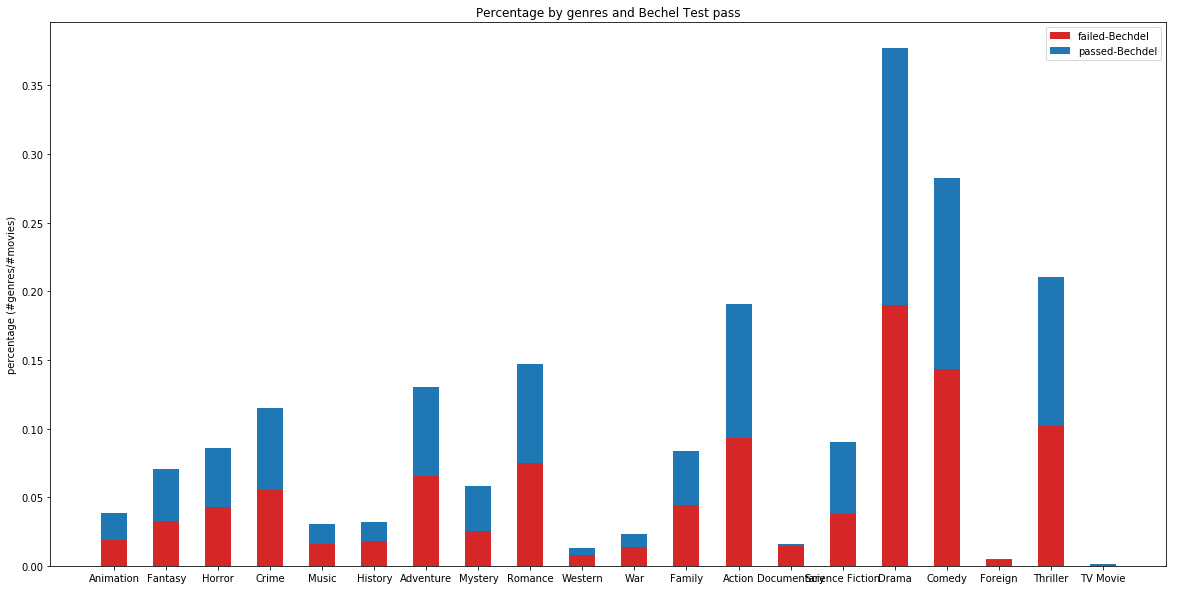

In [14]:
# Stacked Bars: Bechdel Test % / Movie Genres
N = len(df_genres.columns)
ind = np.arange(N)
width = 0.5

plt.figure(figsize=(20,10))
p1 = plt.bar(ind, df_genres.loc[[0]].values[0], width, color='#d62728')
p2 = plt.bar(ind, df_genres.loc[[1]].values[0], width, bottom=df_genres.loc[[0]].values[0])

plt.ylabel('percentage (#genres/#movies)')
plt.title('Percentage by genres and Bechel Test pass')
plt.xticks(ind,df_genres.columns)
plt.legend((p1[0],p2[0]),('failed-Bechdel','passed-Bechdel'))

In [15]:
###### One-Hot Encoding --- ML Preperation ######
#################################################

# Since many columns such as “crew”, “cast” contain information in json format, we need to 
# extract useful information from the columns and then perform one hot encoding.
# We will transform our dataset into a all numeric matrix so that we can feed the data into 
# our machine learning model.
# To look at the structure of column (eg.”cast”), we can use: df.loc[0,’cast’]

def feature_engineering(column_name, df, json_name):
    """
    Args:
        column_name: the column name in the dataframe that contains a json file that needs to 
        conduct feature engineering on 
        
        df: dataframe that perform feature engineering on
        
        json_name: name in the json file that we want to extract
    
    Returns: new dataframe after feature engineering
    """
    
    name = {}

    for item in df[column_name]:
        group = json.loads(item)
        for it in group:
            if it[json_name] not in name:
                name[it[json_name]] = 1
            else:
                name[it[json_name]] += 1
    
    final = {}
    index = 0
    for k,v in name.items():
        if v > 1:
            final[k] = index
            index += 1
    np_item = np.zeros((len(df),len(final)))
    item_dict = {}
    row = 0
    for item in df[column_name]:
        group = json.loads(item)
        for it in group:
            if it[json_name] in final:
                index = final[it[json_name]]
                np_item[row][index] = 1
        row += 1

    df_item = pd.DataFrame(np_item, columns = list(final.keys()))
    df_output = pd.concat([df,df_item],axis = 1)
    
    return df_output

In [17]:
# DF2 expands all the json data of cast and makes new columns for each one before deleting
# the original cast column.
df2 = feature_engineering("cast", df, "name")
df2 = df2.drop('cast', axis = 1)
df2.items

<bound method DataFrame.iteritems of       winner                                               crew  \
0        1.0  [{"credit_id": "5715157dc3a3684122010c0c", "de...   
1        1.0  [{"credit_id": "53ba7918c3a3685eb1006f7a", "de...   
2        1.0  [{"credit_id": "52fe4259c3a36847f8017773", "de...   
3        1.0  [{"credit_id": "54afb978c3a3683fba003e96", "de...   
4        1.0  [{"credit_id": "52fe4421c3a36847f8084037", "de...   
5        1.0  [{"credit_id": "52fe4290c3a36847f802879d", "de...   
6        1.0  [{"credit_id": "52fe4243c3a36847f8010859", "de...   
7        1.0  [{"credit_id": "52fe43fb9251416c75024edb", "de...   
8        1.0  [{"credit_id": "52fe428bc3a36847f8026fa1", "de...   
9        1.0  [{"credit_id": "52fe463b9251416c75071a61", "de...   
10       1.0  [{"credit_id": "562643e89251413ded006a07", "de...   
11       1.0  [{"credit_id": "52fe4285c3a36847f80258d9", "de...   
12       1.0  [{"credit_id": "52fe4380c3a36847f8058d3d", "de...   
13       1.0  [{"credit_i

In [11]:
# DF3 expands all the json data of crew and makes new columns for each one before deleting
# the original crew column.
crew_name = {}

# Director
for item in df2['crew']:
    crew = json.loads(item)
    for it in crew:
        if it['job'] == 'Director':
            if it['name'] not in crew_name:
                crew_name[it['name']] = 1
            else:
                crew_name[it['name']]+=1


# Set the appear tims for Actors
final_crew = {}
index = 0
for k,v in crew_name.items():
    if v > 0:
        final_crew[k] = index
        index += 1
# print(len(final_crew))

np_crew = np.zeros((len(df2), len(final_crew)))
row = 0
for item in df2['crew']:
    crew = json.loads(item)
    for it in crew:
        if it['job'] == 'Director':
            if it['name'] in final_crew:
                index = final_crew[it['name']]
                np_crew[row][index] = 1
    row += 1

df_crew = pd.DataFrame(np_crew, columns = list(final_crew.keys()))
            
df3 = pd.concat([df2, df_crew], axis = 1)
print(df.shape)
#df3.head(3)

(4795, 13)


In [12]:
# Doing the same concept but for a multitude of json filled column entries across the entire
# DataFrame. Each evolution is morphed into the next until we get to DF8 in this part.
df3=df3.drop(['crew'],axis=1)
#genres
df4 = feature_engineering("genres", df3, "name")
df4 = df4.drop(['genres'], axis = 1)
#keywords
df5 = feature_engineering('keywords', df4, 'name')
df5 = df5.drop(['keywords'], axis = 1)
#production_companies
df6 = feature_engineering('production_companies',df5,'name')
df6 = df6.drop(['production_companies'],axis=1)
#production_countries
df7 = feature_engineering('production_countries',df6,'name')
df7 = df7.drop(['production_countries'],axis=1)
#spoken_languages
#df8 = feature_engineering('spoken_languages',df7,'iso_639_1')
#df8 = df8.drop(['spoken_languages'],axis=1)

# movieName, filmInfo, and award columns do not exist -- possible artifacts from team?

df7.head(3)

,winner,overview,release_date,runtime,status,title,Bechdel_Test,Peter O'Toole,Alec Guinness,Anthony Quinn,...,Luxembourg,Kazakhstan,Chile,Argentina,Greece,Thailand,Slovakia,Israel,Colombia,Iran
0,1.0,An epic about British officer T.E. Lawrence's ...,1962-12-10,216.0,Released,Lawrence of Arabia,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,"The retelling of June 6, 1944, from the perspe...",1962-09-25,178.0,Released,The Longest Day,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,"In a small Alabama town in the 1930s, scrupulo...",1962-12-25,129.0,Released,To Kill a Mockingbird,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# DF_CLEAN is created from DF8 sans the below columns. It will then be encoded into OneHot,
# and then hopefully fit into training sets to create models.
df_clean = df7.drop(["overview", "title", "status", "release_date"], axis=1)

print(df_clean.shape)
df_clean.head(3)

(4795, 24412)


,winner,runtime,Bechdel_Test,Peter O'Toole,Alec Guinness,Anthony Quinn,Jack Hawkins,Omar Sharif,Claude Rains,Anthony Quayle,...,Luxembourg,Kazakhstan,Chile,Argentina,Greece,Thailand,Slovakia,Israel,Colombia,Iran
0,1.0,216.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,178.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,129.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Debugging for 2 cells below ValueError
# Ended up being easier to just drop the two problem rows containing NaNs
df_clean = df_clean.dropna(axis='index', how='any')

print(f"Number of null values in entire DF: {df_clean.isnull().sum().sum()}\n")

# If non-float types exist they'll be printed
for dtype in df_clean.dtypes:
    if dtype != float:
        print(dtype)

Number of null values in entire DF: 0



In [15]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#?                      Big Brain Stuff Ahead                    ?#
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Model Training --- I replaced winner with Bechdel_Test
X = df_clean[df_clean.columns.difference(['Bechdel_Test'])]
# X = StandardScaler().fit_transform(X)
y = df_clean['winner']

In [16]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75, random_state=90001, shuffle=True, stratify=y)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
fit = pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(penalty='elasticnet', multi_class='ovr', n_jobs=-1, l1_ratio=0, random_state=288, solver='saga', max_iter=5000, verbose=10)
logisticRegr.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 2153 epochs took 236 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.9min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0, max_iter=5000,
                   multi_class='ovr', n_jobs=-1, penalty='elasticnet',
                   random_state=288, solver='saga', tol=0.0001, verbose=10,
                   warm_start=False)

In [20]:
# Predict for One Observation
predicted = logisticRegr.predict(X_test)
print(logisticRegr.predict(X_test))
print(y_test.index)

[0. 0. 0. ... 0. 0. 0.]
Int64Index([1178, 4399, 3445, 1763,  240, 3532, 1846, 1765, 2997, 3588,
            ...
             657, 3435, 4154,  229, 1136, 4061, 4035,   71, 1966, 1612],
           dtype='int64', length=1199)


In [21]:
logisticRegr.score(X_train, y_train)

1.0

In [22]:
logisticRegr.score(X_test, y_test)

0.896580483736447

In [23]:
from sklearn.metrics import confusion_matrix
import math
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()

print(f"Total - Y_Test: {len(y_test)}")
print(f"Total - Predicted: {len(predicted)}\n")

print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}\n")

sensitivity = tp/(tp+fn)
print(f"Sensetivity / True Positive Rate: {sensitivity}\n")

specificity = tn/(tn+fp)
print(f"Specificity / True Negative Rate: {specificity}\n")

precision = tp/(tp+fp)
print(f"Precision / Positive Predictive Value: {precision}\n")

npv = tn/(tn+fn)
print(f"Negative Predictive Value: {npv}\n")

miss_rate = fn/(fn+tp)
print(f"Miss Rate / False Negative Rate: {miss_rate}\n")

fall_out = fp/(fp+tn)
print(f"Fall-Out / False Positive Rate: {fall_out}\n")

fdr = fp/(fp+tp)
print(f"False Discovery Rate: {fdr}\n")

fOMr = fn/(fn+tn)
print(f"False Omission Rate: {fOMr}\n")

threat_score = tp/(tp+fn+fp)
print(f"Threat Score / Critical Success Index: {threat_score}\n")

accuracy = (tp+tn)/(tp+tn+fp+fn)
print(f"Accuracy: {accuracy}\n")

f1_score = (2*tp)/((2*tp)+fp+fn)
print(f"F1 Score / Harmonic Mean of Precision(PPV) and Sensetivity(TPR): {f1_score}\n")

mcc = ((tp*tn)-(fp*fn))/math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print(f"Matthews Correlation Coefficient: {mcc}\n")

informedness = (sensitivity+specificity-1)
print(f"Informedness / Bookmaker Informedness: {informedness}\n")

markedness = (precision+npv-1)
print(f"Markedness: {markedness}\n")

Total - Y_Test: 1199
Total - Predicted: 1199

True Negatives: 1040
False Positives: 107
False Negatives: 17
True Positives: 35

Sensetivity / True Positive Rate: 0.6730769230769231

Specificity / True Negative Rate: 0.9067131647776809

Precision / Positive Predictive Value: 0.24647887323943662

Negative Predictive Value: 0.9839167455061495

Miss Rate / False Negative Rate: 0.3269230769230769

Fall-Out / False Positive Rate: 0.09328683522231909

False Discovery Rate: 0.7535211267605634

False Omission Rate: 0.01608325449385052

Threat Score / Critical Success Index: 0.22012578616352202

Accuracy: 0.896580483736447

F1 Score / Harmonic Mean of Precision(PPV) and Sensetivity(TPR): 0.36082474226804123

Matthews Correlation Coefficient: 0.36548747725991815

Informedness / Bookmaker Informedness: 0.5797900878546041

Markedness: 0.230395618745586



In [24]:
# 3-fold Cross validation

from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(random_state=55)

#!~~~   [!]   This will take ~10 hours!   [!]   ~~~#

sumAccuracy = []
#for train,test in skf.split(X,y):
for train,test in sss.split(X,y):
    df_train = df_clean.iloc[train]
    df_test = df_clean.iloc[test]
    train_X = df_train[df_clean.columns.difference(['Bechdel_Test'])]
    train_y = df_train['winner']
    test_X = df_test[df_clean.columns.difference(['Bechdel_Test'])]
    test_y = df_test['winner']
    logisticRegr.fit(train_X, train_y)
    sumAccuracy.append(logisticRegr.score(test_X, test_y))
avg = np.mean(sumAccuracy)
print(f"\n\n3-Fold Cross Validation Mean Score: {avg}\n\n")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 3634 epochs took 3831 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 63.9min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 63.9min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 3637 epochs took 3848 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 64.1min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 64.1min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 3634 epochs took 3420 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 57.0min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 57.0min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 3628 epochs took 3359 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 56.0min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 56.0min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 3634 epochs took 3362 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 56.0min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 56.0min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 3630 epochs took 3523 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 58.7min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 58.7min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 3624 epochs took 3458 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 57.6min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 57.6min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 3638 epochs took 3461 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 57.7min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 57.7min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 3629 epochs took 3514 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 58.6min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 58.6min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 3633 epochs took 3804 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 63.4min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 63.4min finished




3-Fold Cross Validation Mean Score: 0.99375




In [26]:
import pickle
model = LogisticRegression()
model.fit(X_train, y_train)
filename = '99.sav'
pickle.dump(model, open(filename, 'wb'))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
df2

NameError: name 'df2' is not defined

In [1]:
Xnew = [[...], [...]]
ynew = model.predict(Xnew)

